In [10]:
%matplotlib inline
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex, plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from functools import partial
import numpy as np

In [2]:
show_unitary = partial(array_to_latex, max_size=100000)
show_state = lambda qc: Statevector(qc).draw('latex')

In [3]:
def get_unitary(qc, sim=AerSimulator()):
    qc_copy = qc.copy()
    qc_copy.save_unitary()
    unitary = sim.run(transpile(qc_copy, sim), shots=1000).result().get_unitary()
    return unitary

In [34]:
def measure(qc, sim=AerSimulator()):
    qc_copy = qc.copy()
    qc_copy.measure_all()
    result = sim.run(transpile(qc_copy, sim), shots=1000).result().get_counts()
    return result

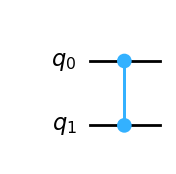

<IPython.core.display.Latex object>

In [4]:
mem = QuantumCircuit(2, name="QROM")
mem.cz(0,1)
display(mem.draw('mpl'))
show_unitary(get_unitary(mem))

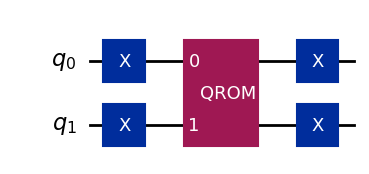

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
qc = QuantumCircuit(2)

qc.x(range(2))
qc.append(mem, [0,1])
qc.x(range(2))

display(qc.draw('mpl'))
display(show_unitary(get_unitary(qc)))
show_state(qc)

---

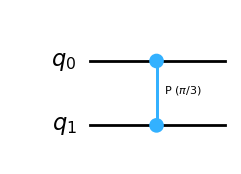

<IPython.core.display.Latex object>

In [8]:
mem = QuantumCircuit(2, name="QROM")
mem.cp(np.pi/3,0,1)
display(mem.draw('mpl'))
show_unitary(get_unitary(mem))

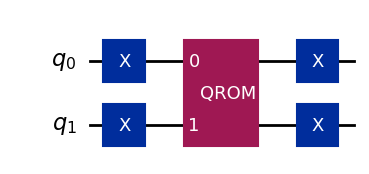

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [9]:
qc = QuantumCircuit(2)

qc.x(range(2))
qc.append(mem, [0,1])
qc.x(range(2))

display(qc.draw('mpl'))
display(show_unitary(get_unitary(qc)))
show_state(qc)

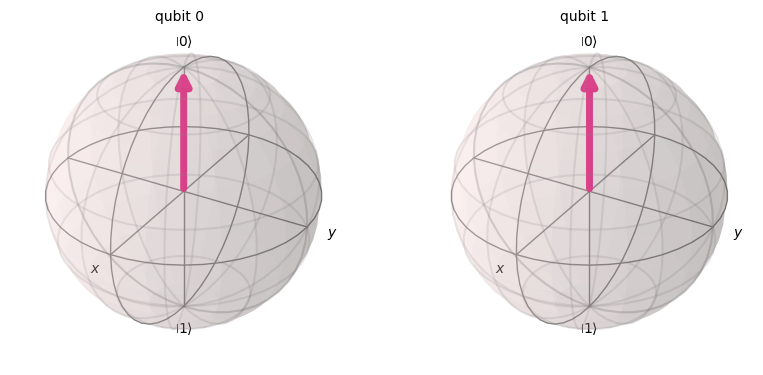

In [11]:
plot_bloch_multivector(qc)

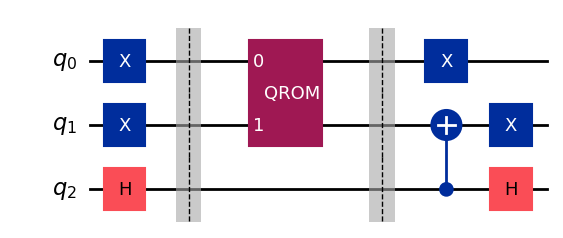

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

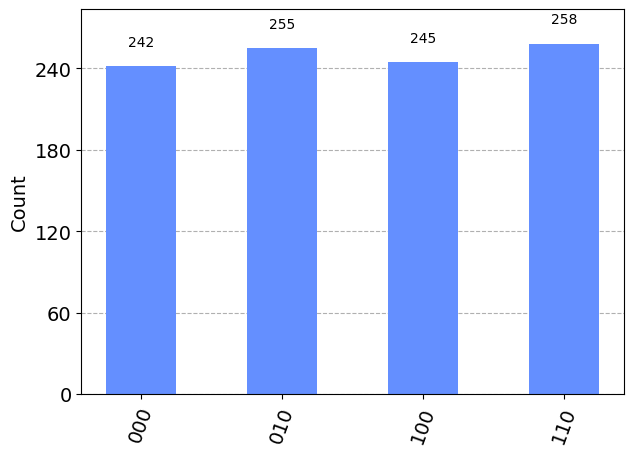

In [40]:
qc = QuantumCircuit(3)

qc.x(range(2))
qc.h(2)

qc.barrier()
qc.append(mem, [0,1])
qc.barrier()
qc.cx(2,1)
qc.x(range(2))
qc.h(2)



display(qc.draw('mpl'))
display(show_unitary(get_unitary(qc)))
display(show_state(qc))
display(plot_histogram(measure(qc)))


---

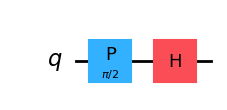

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

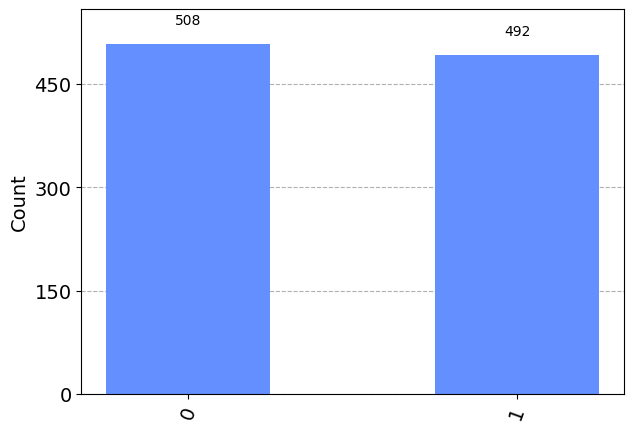

In [66]:
qc = QuantumCircuit(1)
#qc.h(0)
qc.p(np.pi/2, 0)
#qc.barrier()
#qc.cx(1,0)
qc.h(0)

display(qc.draw('mpl'))
display(show_unitary(get_unitary(qc)))
display(show_state(qc))
display(plot_histogram(measure(qc)))

---

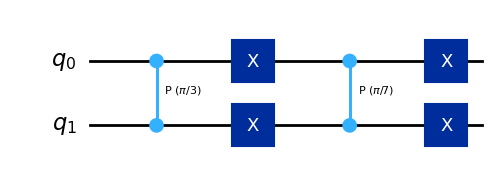

<IPython.core.display.Latex object>

In [70]:
mem = QuantumCircuit(2, name="QROM")
mem.cp(np.pi/3,0,1)
mem.x(range(2))
mem.cp(np.pi/7,0,1)
mem.x(range(2))
display(mem.draw('mpl'))
show_unitary(get_unitary(mem))

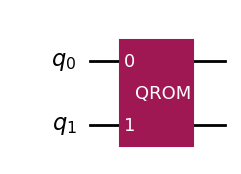

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [74]:
qc = QuantumCircuit(2)

#qc.x(range(2))
c
#qc.x(range(2))

display(qc.draw('mpl'))
display(show_unitary(get_unitary(qc)))
show_state(qc)